In [1]:
from langgraph.graph import StateGraph, START, END
from langgraph.checkpoint.memory import InMemorySaver
from typing import TypedDict
import time
import requests

In [2]:
# state
class CrashState(TypedDict):
    input: str
    step1: str
    step2: str
    step3: str

In [ ]:
# tasks
import sys
def step1(state: CrashState) -> CrashState:
    print("Step1 Executed")

    return {"step1": "done", "input": state['input']}


# tasks
def step2(state: CrashState) -> CrashState:
    print("Step2 will be decided based on correct API link")
    response = requests.get(input('Enter URL'))
    if not response.ok:
        print("Incorrect API!, Exiting!!")
        sys.exit()
    else:
        return {"step2": 'done'}


# tasks
def step3(state: CrashState) -> CrashState:
    print("Step3 Executed")

    return {"step3": "done"}

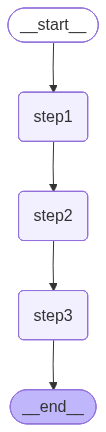

In [4]:
# nodes
graph = StateGraph(CrashState)


graph.add_node('step1', step1)
graph.add_node('step2', step2)
graph.add_node('step3', step3)

graph.add_edge(START, 'step1')
graph.add_edge('step1', 'step2')
graph.add_edge('step2', 'step3')
graph.add_edge('step3', END)


checkpointer = InMemorySaver()
workflow = graph.compile(checkpointer=checkpointer)
workflow

In [ ]:

# give input as  -     https://v2.jokeapi.dev/joke/ny
config = {'configurable': {'thread_id':1}}
workflow.invoke({'input':'Test'}, config=config)

Step1 Executed
Step2 
Incorrect API!, Exiting!!


SystemExit: 

d:\local_synced\workspace\genAI\venv\Lib\site-packages\IPython\core\interactiveshell.py:3709: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [6]:
list(workflow.get_state_history(config)) # step2 crashed

[StateSnapshot(values={'input': 'Test', 'step1': 'done'}, next=('step2',), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f10d84b-be9f-6b07-8001-e5aeb95259f2'}}, metadata={'source': 'loop', 'step': 1, 'parents': {}}, created_at='2026-02-19T11:18:36.471373+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f10d84b-be9d-6787-8000-247038b129c9'}}, tasks=(PregelTask(id='0939f6d6-0ecc-96ef-eb19-7e192ae503ca', name='step2', path=('__pregel_pull', 'step2'), error=None, interrupts=(), state=None, result=None),), interrupts=()),
 StateSnapshot(values={'input': 'Test'}, next=('step1',), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f10d84b-be9d-6787-8000-247038b129c9'}}, metadata={'source': 'loop', 'step': 0, 'parents': {}}, created_at='2026-02-19T11:18:36.470464+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f10d84b-be98-6ca1-

In [ ]:
# give input as     -      https://v2.jokeapi.dev/joke/Any
workflow.invoke(None, config=config)

# as we saw that the code resumed from step2 and step1 was not executed

Step2 
Step3 Executed


{'input': 'Test', 'step1': 'done', 'step2': 'done', 'step3': 'done'}